In [1]:
# Idea taken from Kaggle to learn

import pandas as pd # Importing Libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Added!")

df = pd.read_csv("vgsales.csv") # Reading the csv file

df.head() # Displaying the top five pieces data

Libraries Added!


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.info()
print("--------------------------------------")

df.describe(include='O') # The "0" tells the method to only include the numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
--------------------------------------


,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [3]:
# Data preprocessing and cleaning

df.isnull().sum() # gets the sum of null data points

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
df["Publisher"] = df["Publisher"].fillna("Unknown") # Fills any null Publisher values with Unknown

df[df["Year"].isnull()] # Displays the dataframe where the Year values are all null

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [5]:
df.loc[170:190] # Locates this series of rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
171,172,Pokemon Pinball,GB,1999.0,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
172,173,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.71,0.03,0.44,5.30
173,174,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2.78,0.14,5.30
174,175,Final Fantasy X-2,PS2,2003.0,Role-Playing,Electronic Arts,1.92,1.08,2.11,0.17,5.29
175,176,Donkey Kong 64,N64,1999.0,Platform,Nintendo,3.33,0.79,1.09,0.06,5.27
176,177,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.10,1.56,0.08,0.51,5.27
177,178,Professor Layton and the Curious Village,DS,2007.0,Puzzle,Nintendo,1.22,2.48,1.03,0.52,5.26
178,179,Tomb Raider II,PS,1997.0,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23


In [6]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64") # Converts all other number types in Year to Int64, coerce replaces all non-numeric values with NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df["Year"].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, <NA>, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020,
 2017]
Length: 40, dtype: Int64

In [8]:
df["Year"] = df["Year"].fillna(1950) # Replaces all null values in Year with 1950

df["Year"].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, 1950, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020,
 2017]
Length: 40, dtype: Int64

In [9]:
df.duplicated().sum() # Gets the sum of duplications

np.int64(0)

In [10]:
df["Rank"].agg(["min", "max"]) # Gets minimum and maximum values

min        1
max    16600
Name: Rank, dtype: int64

In [11]:
df["Name"].value_counts()[:10] # Gets the ten most frequent and unique names, and count how many rows each name appears in

Name
Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
Madden NFL 07                   9
FIFA 14                         9
FIFA 15                         8
The LEGO Movie Videogame        8
FIFA Soccer 13                  8
LEGO The Hobbit                 8
Cars                            8
Name: count, dtype: int64

C:\Users\tyler\AppData\Local\Temp\ipykernel_2948\1578994722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_names.index, y=top_names.values, palette="viridis") # Creates the bars in a bar graph


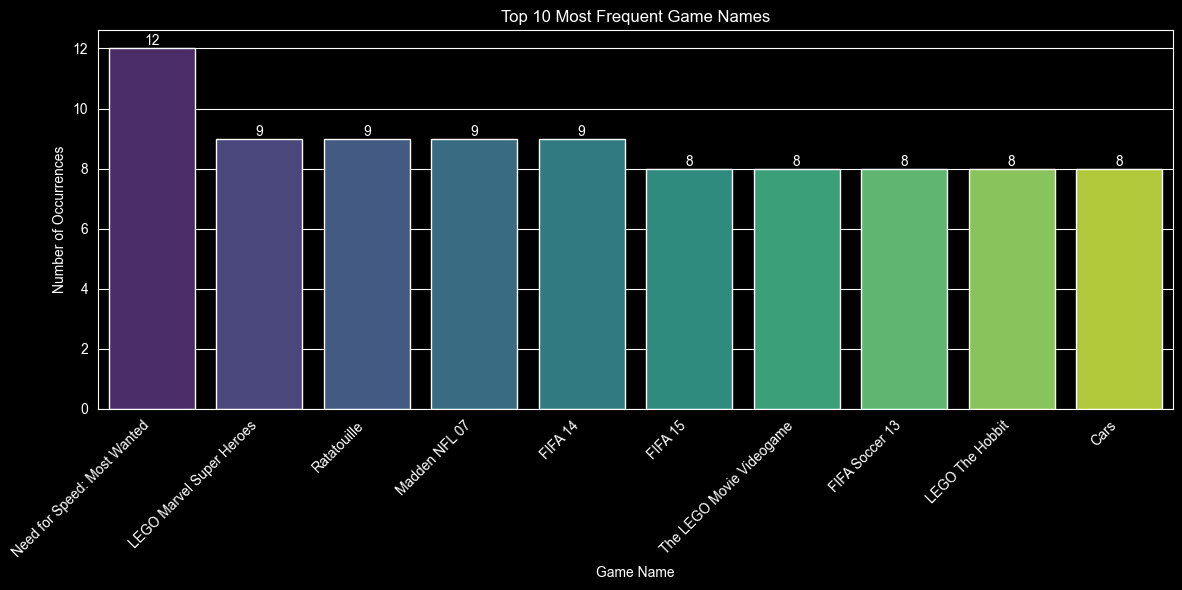

In [12]:
top_names = df["Name"].value_counts()[:10] # Same as the above
plt.figure(figsize = (12,6)) # Sets the size of the graph
ax = sns.barplot(x=top_names.index, y=top_names.values, palette="viridis") # Creates the bars in a bar graph
plt.title("Top 10 Most Frequent Game Names")
plt.xlabel("Game Name") # Sets the x label
plt.ylabel("Number of Occurrences") # Sets the y label
plt.xticks(rotation=45, ha="right") # Changes the label's orientation and alignment
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points') # Every bar in seaborn is called a patch. This cycles through each bar and individually affects them based on these parameters
plt.tight_layout()
plt.show()

In [13]:
df[df["Name"] == "Need for Speed: Most Wanted"] # Creates and displays a new dataframe only where the name is equal to that string value

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [14]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
df["Platform"].nunique() # Gets the number of unique values

31

In [16]:
df["Platform"].value_counts()[:10]

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64

C:\Users\tyler\AppData\Local\Temp\ipykernel_2948\2472684449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="viridis")


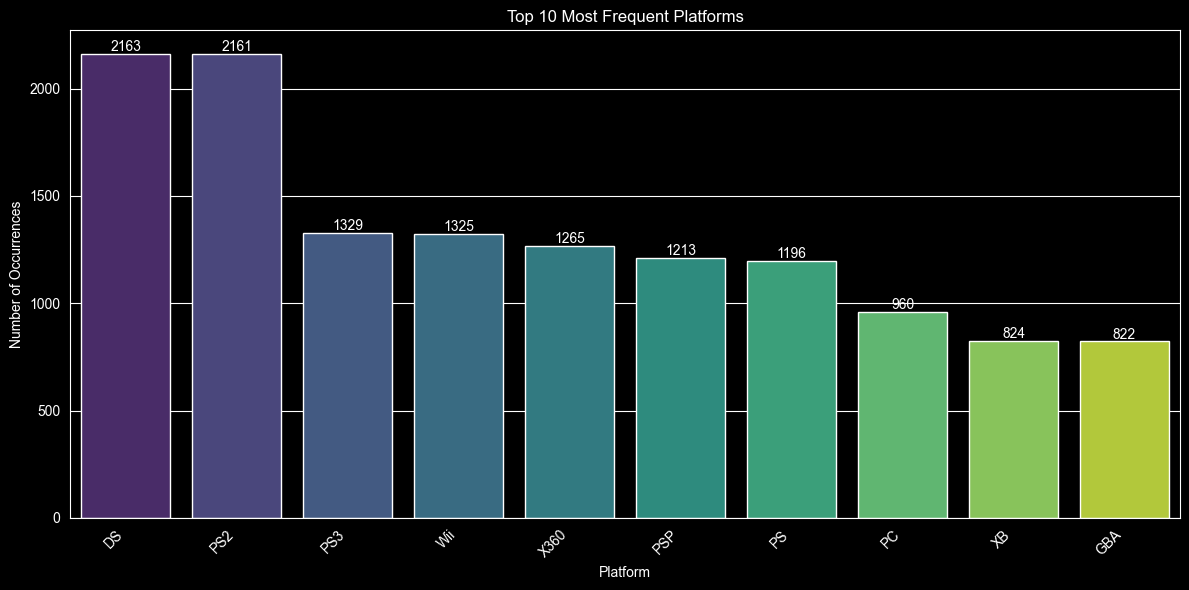

In [17]:
top_platforms = df["Platform"].value_counts()[:10]
plt.figure(figsize = (12,6))
ax = sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="viridis")
plt.title("Top 10 Most Frequent Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0,5), textcoords="offset points")
plt.tight_layout()
plt.show()

In [18]:
df["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Ent

In [19]:
df["Publisher"].value_counts()[:10] # In this case EA is the company with the most games released

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

C:\Users\tyler\AppData\Local\Temp\ipykernel_2948\1992454041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")


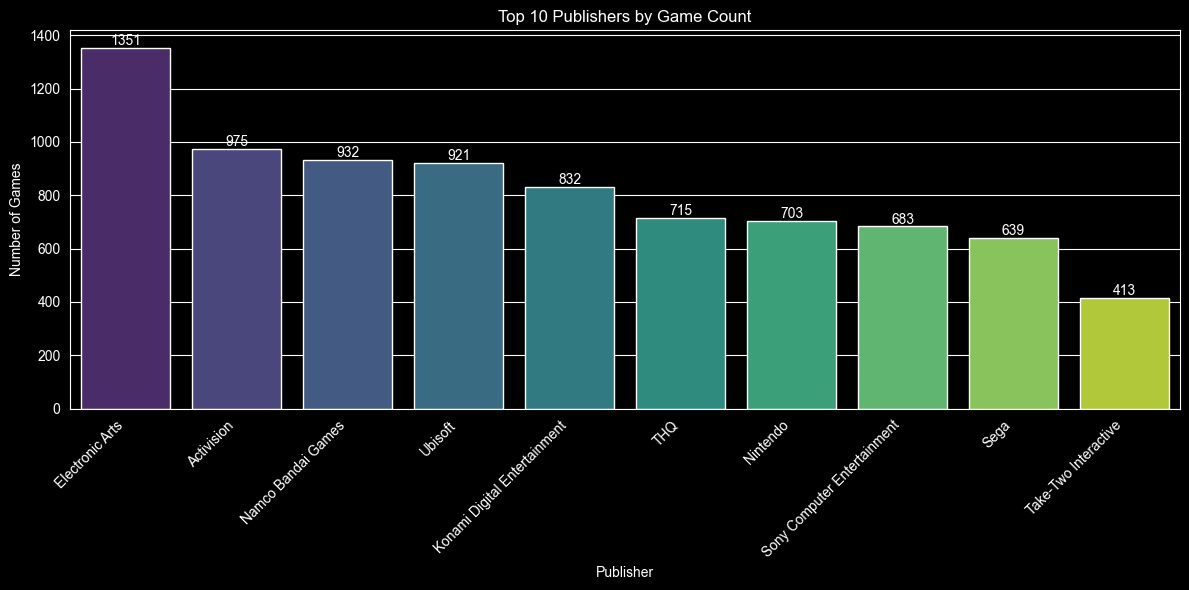

In [20]:
top_publishers = df["Publisher"].value_counts()[:10]
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_publishers.index, y=top_publishers.values, palette="viridis")
plt.title("Top 10 Publishers by Game Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="center", xytext=(0,5), textcoords="offset points")
plt.tight_layout()
plt.show()

In [21]:
df["Year"].value_counts()[:10]

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
Name: count, dtype: Int64

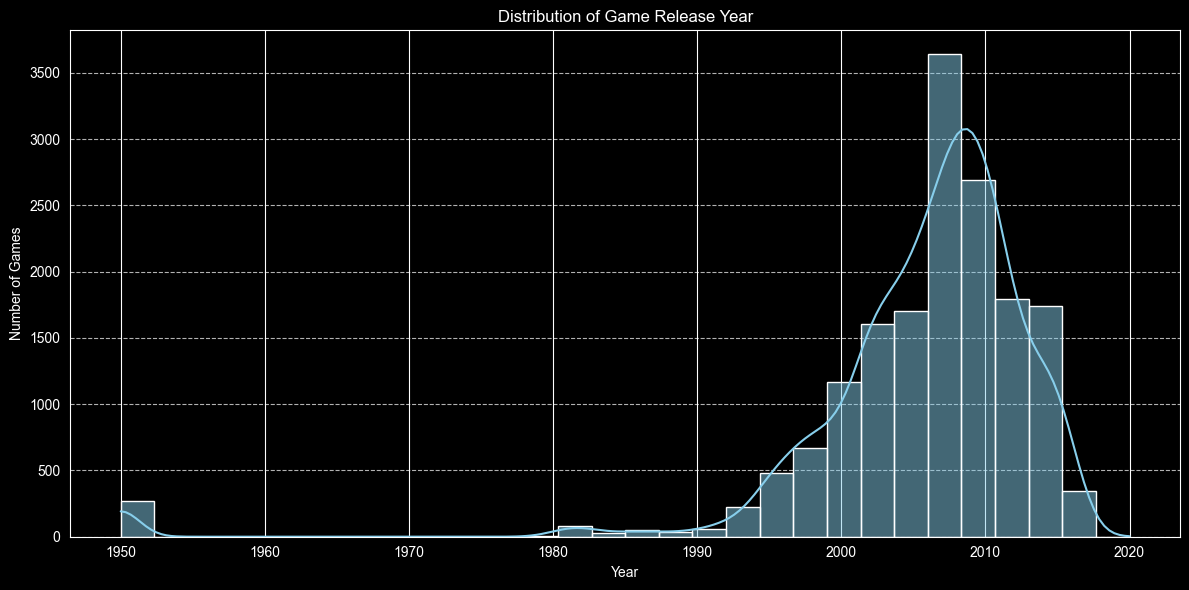

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df["Year"].dropna(), bins=30, kde=True, color="skyblue") # Setting histogram parameters
plt.title("Distribution of Game Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [24]:
df["Genre"].nunique()

12

In [25]:
df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

C:\Users\tyler\AppData\Local\Temp\ipykernel_2948\2956293373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


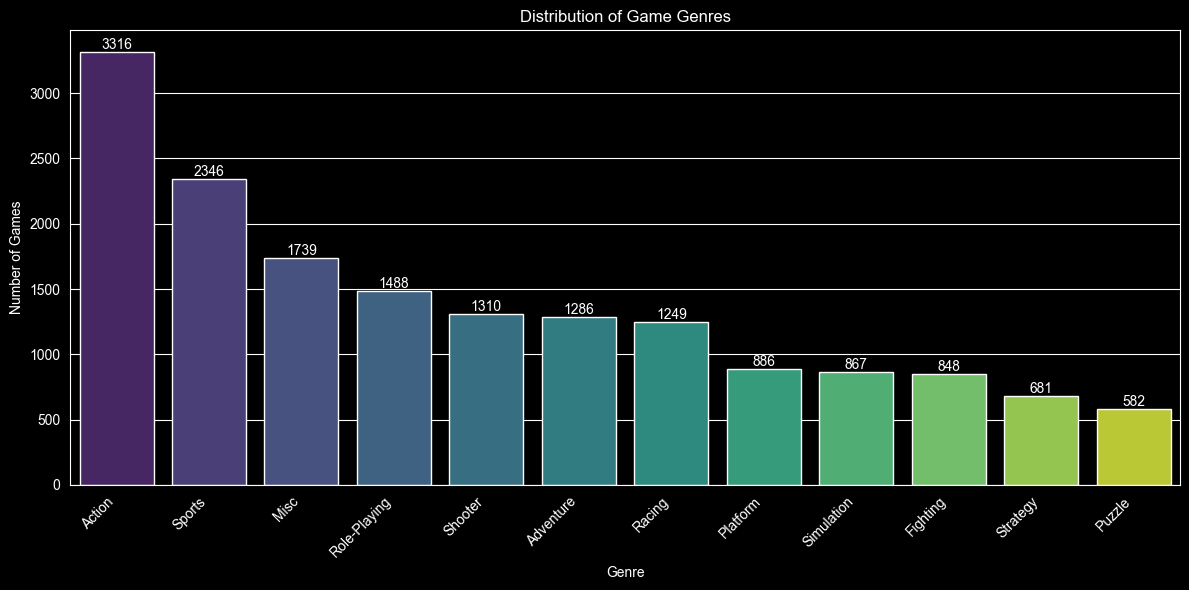

In [26]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [27]:
df.NA_Sales.agg(["min", "max", "sum", "mean"])

min        0.000000
max       41.490000
sum     4392.950000
mean       0.264667
Name: NA_Sales, dtype: float64

In [28]:
df.EU_Sales.agg(["min", "max", "sum", "mean"])

min        0.000000
max       29.020000
sum     2434.130000
mean       0.146652
Name: EU_Sales, dtype: float64

In [29]:
df.JP_Sales.agg(["min", "max", "sum", "mean"])

min        0.000000
max       10.220000
sum     1291.020000
mean       0.077782
Name: JP_Sales, dtype: float64

In [30]:
df.Other_Sales.agg(["min", "max", "sum", "mean"])

min       0.000000
max      10.570000
sum     797.750000
mean      0.048063
Name: Other_Sales, dtype: float64

In [31]:
df.Global_Sales.sum()

np.float64(8920.44)

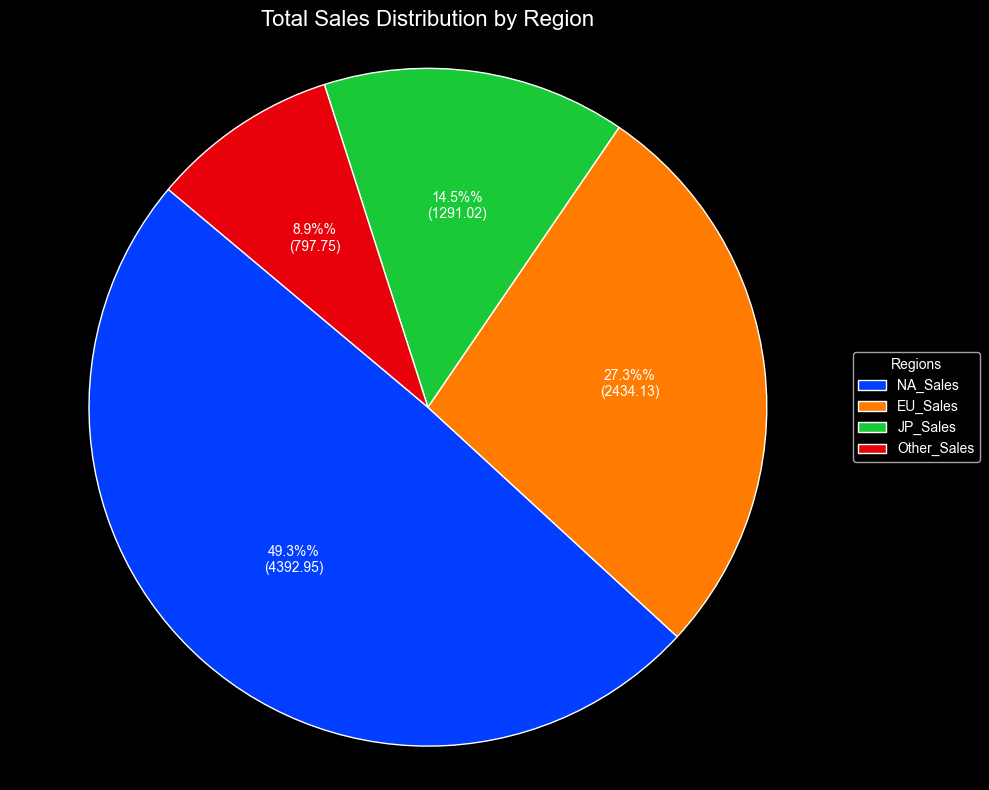

In [32]:
sales_by_region = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

def autopct_format_with_value(pct): # Creating a function for formatting
    total = sales_by_region.sum()
    value = float(pct/100. * total)
    return f"{pct:.1f}%%\n({value:.2f})"

plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(sales_by_region, autopct=autopct_format_with_value, startangle=140, colors=sns.color_palette("bright", 10)) # Creating a pie chart
plt.title("Total Sales Distribution by Region", fontsize=16)
plt.axis("equal")
plt.legend(wedges, sales_by_region.index, title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

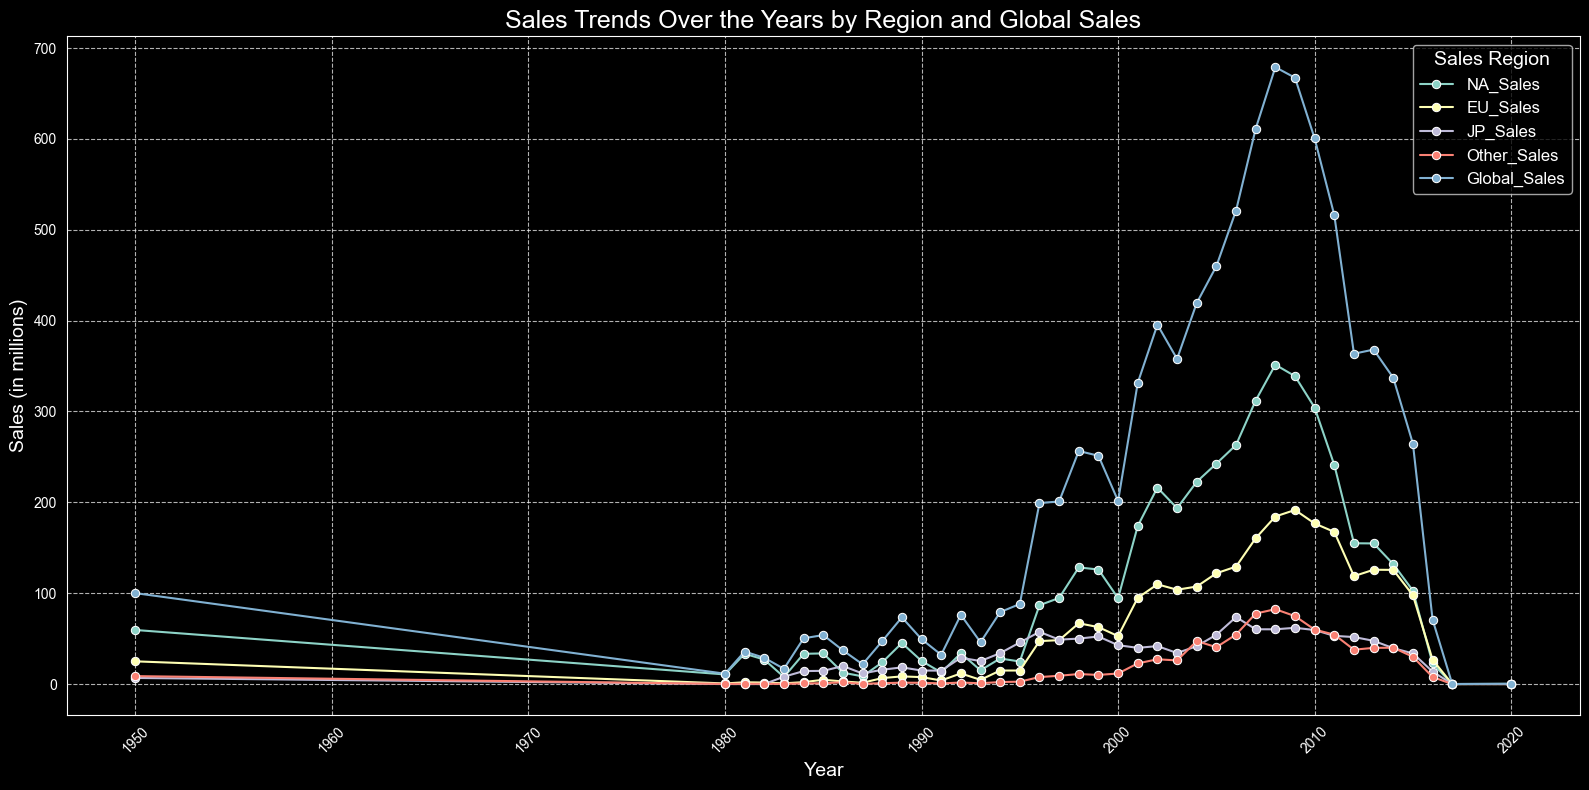

In [33]:
sales_by_year = df.groupby('Year')[['Other_Sales', 'JP_Sales', 'EU_Sales', 'NA_Sales', 'Global_Sales']].sum() # Using .sum() to total the individual unique values (In a way, probs could have explained that better)

plt.figure(figsize=(16, 8))

# Creating the individual line plots to add to the graph

sns.lineplot(x=sales_by_year.index, y=sales_by_year['NA_Sales'], dashes=False, marker='o', label='NA_Sales')
sns.lineplot(x=sales_by_year.index, y=sales_by_year['EU_Sales'], dashes=False, marker='o', label='EU_Sales')
sns.lineplot(x=sales_by_year.index, y=sales_by_year['JP_Sales'], dashes=False, marker='o', label='JP_Sales')
sns.lineplot(x=sales_by_year.index, y=sales_by_year['Other_Sales'], dashes=False, marker='o', label='Other_Sales')
sns.lineplot(x=sales_by_year.index, y=sales_by_year['Global_Sales'], dashes=False, marker='o', label='Global_Sales')

plt.title('Sales Trends Over the Years by Region and Global Sales', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.legend(title='Sales Region', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
